In [4]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# open csv file and load the data into pandas dataframe
appl_df = pd.read_csv('../data/raw/loan.csv')
appl_df.info()

/Users/ashish/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [18]:
appl_df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [11]:
appl_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [14]:
appl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.0000,12900.000000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.0000,12875.000000,20000.000000,4.000000e+04
funded_amnt_inv,2260668.0,15023.437624,9192.331807,0.000000e+00,8000.0000,12800.000000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092913,4.832114,5.310000e+00,9.4900,12.620000,15.990000,3.099000e+01
installment,2260668.0,445.807646,267.173725,4.930000e+00,251.6500,377.990000,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000000,93000.000000,1.100000e+08
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.8900,17.840000,24.490000,9.990000e+02


In [6]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)


In [21]:
appl_df.count(axis=0, numeric_only=False)

id                                                  0
member_id                                           0
loan_amnt                                     2260668
funded_amnt                                   2260668
funded_amnt_inv                               2260668
term                                          2260668
int_rate                                      2260668
installment                                   2260668
grade                                         2260668
sub_grade                                     2260668
emp_title                                     2093699
emp_length                                    2113761
home_ownership                                2260668
annual_inc                                    2260664
verification_status                           2260668
issue_d                                       2260668
loan_status                                   2260668
pymnt_plan                                    2260668
url                         

In [25]:
appl_df.count(axis=1, numeric_only=False)

0          103
1          104
2          102
3          102
4          102
5          102
6           96
7          102
8          106
9          103
10         105
11         102
12         102
13         104
14         101
15         118
16         104
17         113
18         106
19         102
20         106
21         102
22         104
23         120
24         102
25         112
26         102
27         101
28         103
29         102
30         101
31         106
32         106
33         106
34         112
35         104
36         101
37         102
38         102
39         117
40         102
41         102
42          96
43         100
44         101
45         105
46         100
47         102
48         100
49         102
50         103
51         106
52         106
53         102
54         104
55         101
56         105
57         115
58         102
59         105
60         116
61         100
62         102
63         102
64         103
65         105
66        

In [4]:
appl_df.settlement_status.value_counts()

ACTIVE      14811
COMPLETE    13517
BROKEN       4728
Name: settlement_status, dtype: int64

In [7]:
appl_df.drop('member_id', axis=1, inplace=True)
appl_df.drop('id', axis=1, inplace=True)

In [6]:
appl_df.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [8]:
appl_df.shape

(2260668, 143)

In [32]:
appl_df.isnull().sum().value_counts()

0          32
70276      16
2250055    13
2152647     8
866129      8
29          7
2227612     6
50030       4
866130      3
2260668     3
70277       3
58590       2
145         2
1068850     1
139071      1
2139962     1
166969      1
1303607     1
2139958     1
1802        1
1           1
295435      1
4           1
76071       1
2152648     1
70431       1
30          1
23325       1
1679893     1
866348      1
2154484     1
2134601     1
1365        1
146907      1
153657      1
2252242     1
70346       1
1901512     1
73412       1
74935       1
1520309     1
1711        1
2144938     1
1740967     1
73          1
2426        1
75379       1
105         1
1158502     1
2224726     1
909924      1
dtype: int64

In [8]:
df_cleanAppl = appl_df[(appl_df.loan_status == 'Fully Paid') | (appl_df.loan_status == 'Charged Off')]

In [9]:
df_cleanAppl.loan_status.value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [10]:
df_cleanAppl.shape

(1303607, 143)

In [11]:
df_cleanAppl.loan_status.value_counts(normalize=True) #About 80% are ‘Fully Paid’ and 20% are ‘Charged Off’So our sample is biased in this case

Fully Paid     0.799284
Charged Off    0.200716
Name: loan_status, dtype: float64

In [12]:
df_cleanAppl.isnull().any().value_counts() #103 COLUMNS HAVE MISSING VALUES

True     103
False     40
dtype: int64

In [14]:
total_num = df_cleanAppl.isnull().sum().sort_values(ascending=False)
perc = df_cleanAppl.isnull().sum()/df_cleanAppl.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis=1, keys =["Total Missing Values", "Percentage %"], sort=True).sort_values(by =["Percentage %"], ascending = False)
df_miss.reset_index(inplace=True)

In [88]:
df_miss

,Total Missing Values,Percentage %
url,1303607,100.00
next_pymnt_d,1303607,100.00
orig_projected_additional_accrued_interest,1300174,99.74
deferral_term,1298272,99.59
hardship_last_payment_amount,1298272,99.59
hardship_payoff_balance_amount,1298272,99.59
hardship_end_date,1298272,99.59
hardship_dpd,1298272,99.59
hardship_amount,1298272,99.59
hardship_reason,1298272,99.59


In [68]:
perc1

url                                           100.00
next_pymnt_d                                  100.00
orig_projected_additional_accrued_interest     99.74
hardship_end_date                              99.59
hardship_length                                99.59
hardship_type                                  99.59
hardship_reason                                99.59
hardship_status                                99.59
deferral_term                                  99.59
hardship_amount                                99.59
hardship_start_date                            99.59
payment_plan_start_date                        99.59
hardship_loan_status                           99.59
hardship_dpd                                   99.59
hardship_payoff_balance_amount                 99.59
hardship_last_payment_amount                   99.59
sec_app_mths_since_last_major_derog            99.54
sec_app_revol_util                             98.76
sec_app_chargeoff_within_12_mths              

In [69]:
total_num

url                                           1303607
next_pymnt_d                                  1303607
orig_projected_additional_accrued_interest    1300174
hardship_end_date                             1298272
hardship_start_date                           1298272
hardship_type                                 1298272
hardship_reason                               1298272
hardship_status                               1298272
deferral_term                                 1298272
hardship_last_payment_amount                  1298272
hardship_payoff_balance_amount                1298272
hardship_loan_status                          1298272
hardship_dpd                                  1298272
hardship_length                               1298272
payment_plan_start_date                       1298272
hardship_amount                               1298272
sec_app_mths_since_last_major_derog           1297675
sec_app_revol_util                            1287389
revol_bal_joint             

In [14]:
df_miss[df_miss['Percentage %']>50].count()

index                   56
Total Missing Values    56
Percentage %            56
dtype: int64

In [77]:
perc1.shape

(143,)

In [92]:
df_miss.count()

Total Missing Values    143
Percentage %            143
dtype: int64

In [15]:
df_NewAppl = df_cleanAppl.drop(df_miss[df_miss["Percentage %"]>50]["index"], axis = 1)

In [16]:
df_NewAppl.shape

(1303607, 87)

In [101]:
df_miss[df_miss["Percentage %"]>50]["index"] # features that were dropped

0                                            url
1                                   next_pymnt_d
2     orig_projected_additional_accrued_interest
3                                  deferral_term
4                   hardship_last_payment_amount
5                 hardship_payoff_balance_amount
6                              hardship_end_date
7                                   hardship_dpd
8                                hardship_amount
9                                hardship_reason
10                           hardship_start_date
11                               hardship_status
12                                 hardship_type
13                          hardship_loan_status
14                               hardship_length
15                       payment_plan_start_date
16           sec_app_mths_since_last_major_derog
17                            sec_app_revol_util
18                         sec_app_num_rev_accts
19              sec_app_chargeoff_within_12_mths
20                  

In [17]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']
drop_list = [col for col in df_NewAppl.columns if col not in keep_list]
print(drop_list) 

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex

In [18]:
df_NewAppl.drop(labels=drop_list, axis=1, inplace=True)

In [19]:
df_NewAppl.shape

(1303607, 28)

In [20]:
sorted(df_NewAppl.columns)

['addr_state',
 'annual_inc',
 'application_type',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'initial_list_status',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'mort_acc',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'verification_status',
 'zip_code']

In [21]:
#Zip code is in the format-891xx    900xx    etc. We have clean that.
df_NewAppl.zip_code = df_NewAppl.zip_code.str.replace("xx","") 

In [22]:
#Next is formatting the dates- for e.g. Oct-2013 to 2015-10-01  format
df_NewAppl.issue_d = pd.to_datetime(df_NewAppl.issue_d,infer_datetime_format=True)
df_NewAppl['earliest_cr_line'] = pd.to_datetime(df_NewAppl['earliest_cr_line'],infer_datetime_format=True)

Next is cleaning up the employment length feature as follows-
The values are -
10+ years
 < 1 year
 2 years
 3 years etc
We will make it as 0/1/2/3/...10 etc

In [23]:
df_NewAppl['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
df_NewAppl['emp_length'].replace('< 1 year', '0 years', inplace=True)

def emp_length_to_int(str_val):
    if pd.isnull(str_val):
        return str_val
    else:
        return np.int8(str_val.split()[0])
df_NewAppl['emp_length'] = df_NewAppl['emp_length'].apply(emp_length_to_int)

In [ ]:
#Next we will move on to EDA with individual features

Next, We will inspect each feature individually.
We will perform the univariate and bivariate analysis using the folloiwng steps-
    Summary statistics
    Plot individually
    Plot against our target variable- loan_status
    Modify the feature to make it ready for modelling, if necessary

	For individual summary statistics we will use 
        .describe()
        .sample(5)
        .nunique()
     
    Finally we will plot the feature against our target feature loan_status to see if and how both are related


1.addr_state
2.zip_code

In [24]:
print(df_NewAppl.addr_state.describe())
print(df_NewAppl.addr_state.sample(5))
print(df_NewAppl.addr_state.nunique())



count     1303607
unique         51
top            CA
freq       191032
Name: addr_state, dtype: object
1689124    TX
986030     TX
1903968    CA
1946327    GA
1905514    AZ
Name: addr_state, dtype: object
51


In [25]:
print(df_NewAppl.zip_code.describe())
print(df_NewAppl.zip_code.sample(5))
print(df_NewAppl.zip_code.nunique())


count     1303606
unique        943
top           945
freq        14625
Name: zip_code, dtype: object
1942885    330
945016     950
530691     293
1937466    182
2027063    223
Name: zip_code, dtype: object
943


In [ ]:
This shows there are 51 unique states and 943 values for zip_code. These are too many values i.e. lot of different zip codes. So we will drop the zip_code column.


In [26]:
df_NewAppl.drop(labels='zip_code', axis=1, inplace=True)

3. loan_amnt




In [27]:
def plot_var(col_name, full_name, continuous):
    """
    plot a variable with and without loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name- for display purposes
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(df_NewAppl.loc[df_NewAppl[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df_NewAppl[col_name], order=sorted(df_NewAppl[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df_NewAppl, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = df_NewAppl.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

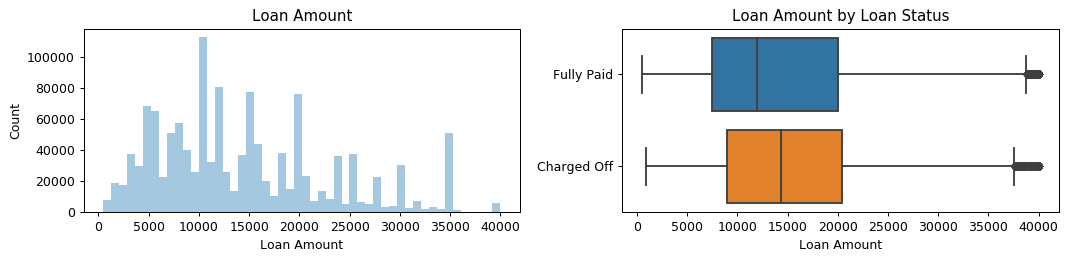

In [29]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [ ]:
#After plotting we see charged off loans have higher loan amount

4. term

In [31]:
print(df_NewAppl.term.describe())
print(df_NewAppl.term.sample(5))
print(df_NewAppl.term.nunique())
print(df_NewAppl.term.value_counts())

count        1303607
unique             2
top        36 months
freq          988754
Name: term, dtype: object
1292703     60 months
1260338     60 months
2055311     36 months
1447135     36 months
1403844     36 months
Name: term, dtype: object
2
 36 months    988754
 60 months    314853
Name: term, dtype: int64


In [32]:
#Term has values ‘36 months’ or ‘60 months’. We will convert it into integer as follows
df_NewAppl['term'] = df_NewAppl['term'].apply(lambda s: np.int8(s.split()[0]))

In [33]:
df_NewAppl['term'].value_counts(normalize=True) #SHows about 76% of loans have 3 year period and rest are 5 year loans

36    0.758476
60    0.241524
Name: term, dtype: float64

In [34]:
df_NewAppl.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
#If we focus only on charged off loans, 5 year loans are almost TWICE as likely to go BAD as 3 year loans!!!

term
36    0.160959
60    0.325568
Name: loan_status, dtype: float64

5. Int_rate

In [37]:
print(df_NewAppl.int_rate.describe())
print(df_NewAppl.int_rate.sample(5))
print(df_NewAppl.int_rate.nunique())
#print(df_NewAppl.int_rate.value_counts())

count    1.303607e+06
mean     1.325722e+01
std      4.760544e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64
2211504    19.03
763914     16.29
1465978    18.06
1218734    13.33
1337206    12.99
Name: int_rate, dtype: float64
654


Shows int_rate ranges from 5 to 40%!!!

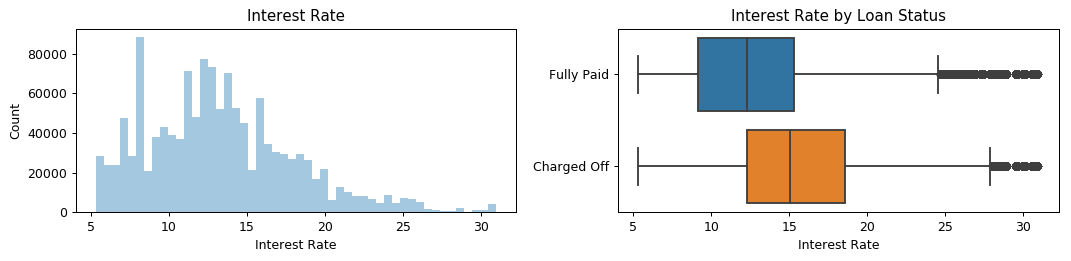

In [38]:
plot_var('int_rate', 'Interest Rate', continuous=True)

Shows charged off loans have much HIGHER interest rate!!

Next let's compare the summary statistics by loan status:

In [41]:
df_NewAppl.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,15.712087,4.897685,5.31,12.29,15.05,18.55,30.99
Fully Paid,1041952.0,12.640755,4.520709,5.31,9.17,12.29,15.31,30.99


6. Installment

In [39]:
print(df_NewAppl.installment.describe())
print(df_NewAppl.installment.sample(5))
print(df_NewAppl.installment.nunique())

count    1.303607e+06
mean     4.380850e+02
std      2.610632e+02
min      4.930000e+00
25%      2.488200e+02
50%      3.754300e+02
75%      5.804500e+02
max      1.719830e+03
Name: installment, dtype: float64
2138382    149.40
924917      98.21
1307987    164.78
1157507    359.38
1850566    259.52
Name: installment, dtype: float64
82574


In [ ]:
#Installments range from $4.93 to $1,719, with a median of $375

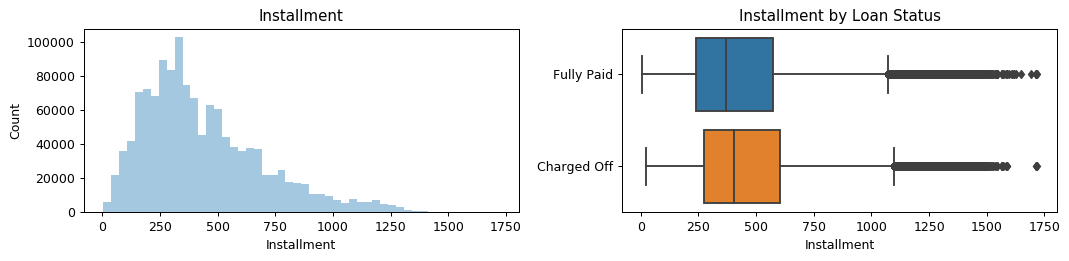

In [42]:
plot_var('installment', 'Installment', continuous=True)

Charged-off loans tend to have higher installments. Let's compare the summary statistics by loan status:

In [43]:
df_NewAppl.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,464.749514,262.341293,21.62,275.22,402.83,604.145,1717.63
Fully Paid,1041952.0,431.388962,260.312645,4.93,241.12,368.63,573.060,1719.83


7. grade
8. sub_grade

In [44]:
print(sorted(df_NewAppl['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [45]:
print(sorted(df_NewAppl['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [47]:
#the grade is implied by the subgrade, so let's drop the grade column.
df_NewAppl.drop('grade', axis=1, inplace=True)

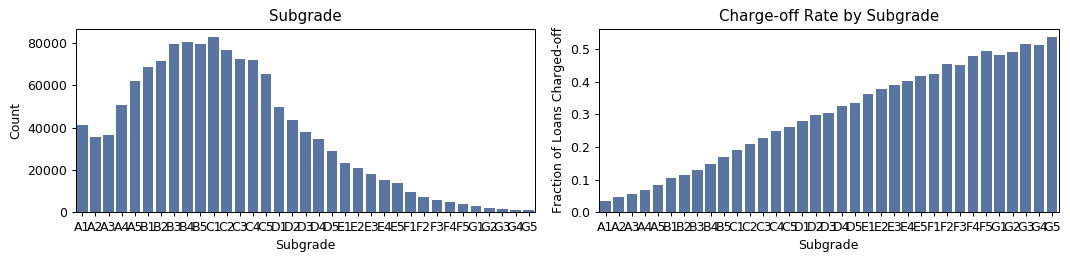

In [48]:
plot_var('sub_grade', 'Subgrade', continuous=False)

There's a clear trend of higher probability of charge-off as the subgrade gets worse!

9. emp_title

In [50]:
df_NewAppl['emp_title'].describe()

count     1221028
unique     371435
top       Teacher
freq        20496
Name: emp_title, dtype: object

In [51]:
#There are too many unique values of emp_title to be useful. So we will drop this feature
df_NewAppl.drop(labels='emp_title', axis=1, inplace=True)

10. emp_length

In [55]:
df_NewAppl['emp_length'].value_counts(dropna=False).sort_index()

 0.0     104550
 1.0      85677
 2.0     117820
 3.0     104200
 4.0      78029
 5.0      81623
 6.0      60933
 7.0      58145
 8.0      59125
 9.0      49504
 10.0    428547
NaN       75454
Name: emp_length, dtype: int64

Note there are 75454 loans with missing value for the length of employment.


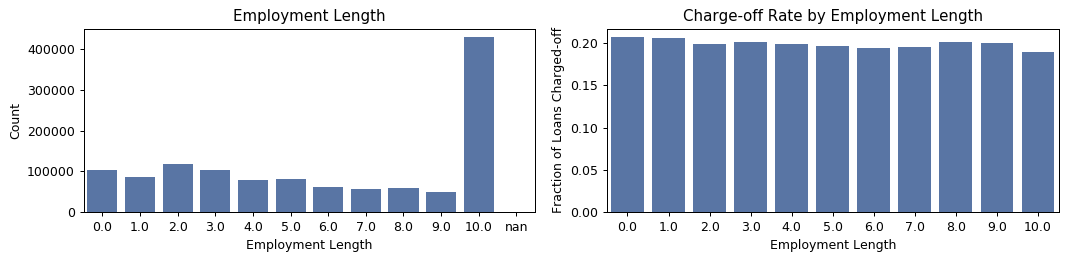

In [56]:
plot_var('emp_length', 'Employment Length', continuous=False)

THere doesn't seem to be significant effect of employment length on loan status
As the plot shows loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.

11. home_ownership

In [58]:
df_NewAppl['home_ownership'].value_counts(dropna=False)

MORTGAGE    645496
RENT        517808
OWN         139844
ANY            267
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

Let's combine the category ANY and NONO into OTHER

In [59]:
df_NewAppl['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [60]:
df_NewAppl['home_ownership'].value_counts(dropna=False)

MORTGAGE    645496
RENT        517808
OWN         139844
OTHER          459
Name: home_ownership, dtype: int64

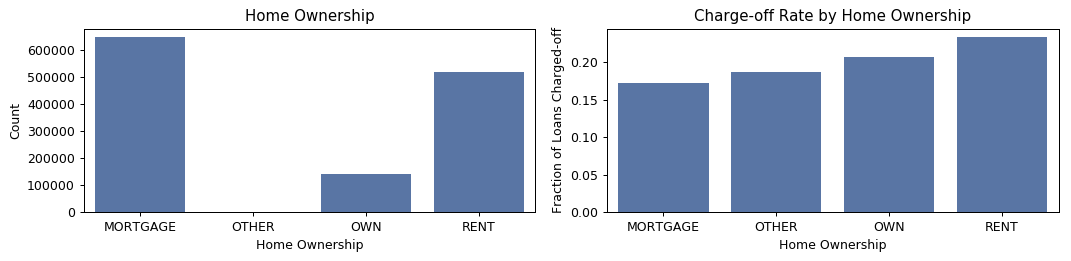

In [61]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appears to be significant differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge-off. Let's compare the charge-off rates:

In [62]:
df_NewAppl.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.172986
OTHER       0.187364
OWN         0.207453
RENT        0.233477
Name: loan_status, dtype: float64